In [1]:
import warnings
warnings.filterwarnings('ignore')

#Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import scipy
from pandas_datareader import wb
from datetime import datetime
import matplotlib.pyplot as plt

# **LINEAR REGRESSION**

## **¿What is linear regression?**

<font size="3"> Linear regression is a linear model, e.g. a model that assumes a linear relationship between the input variables (x) and the single output variable (y). More specifically, that y can be calculated from a linear combination of the input variables (x). The equation for the 1 dimensional case is: 
    
<br><br>

<font size="5"> 

$y = \beta _0 + \beta _1 * x$  

<br>


<font size="3"> Let's suppose we have two variables x, y with the following values: </font>  <br>


<font size="5">
    
| x  | y |
| -- | -- |
| 5.3  | 5.8  |
| 1.1  | 1.5  |
| ...  | ...  |
| 7.8  | 8.3  |

<br>

<font size="3"> If we plot these points we get: <br>

![This is an image](Nube_puntos.png)

<font size="3"> The straight line shows the relationship between both variables using the following equation:  <br>

In [1]:
#Parameters to get the data from World Bank Database
start = datetime(1990, 1, 1)
end = datetime(2021, 12, 31)
indicator_id1 = 'NY.GDP.PCAP.KD' #GDP per capita
# indicator_id1 = 'NY.GDP.PCAP.PP.KD' #GDP per capita PPP
indicator_id2 = 'SE.XPD.TOTL.GD.ZS' #Government expenditure on education, total (% of GDP)


#Download data
gdp_per_capita = wb.download(indicator=indicator_id1, start=start, end=end, country='all')
gdp_per_capita.reset_index(inplace=True)

education_spending = wb.download(indicator=indicator_id2, start=start, end=end, country = 'all')
education_spending.reset_index(inplace=True)

In [2]:
#Filter the data for only one year - so that we get cross sectional data
gdp_per_capita_2018 = gdp_per_capita[gdp_per_capita['year']=='2018']
education_spending_2018 = education_spending[education_spending['year']=='2018']

In [3]:
gdp_per_capita_2018

,country,year,NY.GDP.PCAP.KD
2,Africa Eastern and Southern,2018,1533.514183
33,Africa Western and Central,2018,1843.545758
64,Arab World,2018,6258.315712
95,Caribbean small states,2018,10032.486841
126,Central Europe and the Baltics,2018,14243.054242
...,...,...,...
8093,Virgin Islands (U.S.),2018,35073.630657
8124,West Bank and Gaza,2018,3417.794408
8155,"Yemen, Rep.",2018,1290.925239
8186,Zambia,2018,1368.601756


In [4]:
education_spending_2018

,country,year,SE.XPD.TOTL.GD.ZS
2,Africa Eastern and Southern,2018,4.951635
33,Africa Western and Central,2018,3.066335
64,Arab World,2018,NaN
95,Caribbean small states,2018,4.350025
126,Central Europe and the Baltics,2018,4.266920
...,...,...,...
8093,Virgin Islands (U.S.),2018,NaN
8124,West Bank and Gaza,2018,5.318870
8155,"Yemen, Rep.",2018,NaN
8186,Zambia,2018,4.739740


In [5]:
#Merge the data into a single DataFrame
df_TOTAL = pd.merge(education_spending_2018,gdp_per_capita_2018[['country',indicator_id1]], left_on='country',right_on='country', how='left')
df_TOTAL.dropna(inplace=True)
df_TOTAL

,country,year,SE.XPD.TOTL.GD.ZS,NY.GDP.PCAP.KD
0,Africa Eastern and Southern,2018,4.951635,1533.514183
1,Africa Western and Central,2018,3.066335,1843.545758
3,Caribbean small states,2018,4.350025,10032.486841
4,Central Europe and the Baltics,2018,4.266920,14243.054242
5,Early-demographic dividend,2018,3.979745,3521.783898
...,...,...,...,...
257,Uzbekistan,2018,5.900000,3047.308384
260,Vietnam,2018,4.167450,2456.791224
262,West Bank and Gaza,2018,5.318870,3417.794408
264,Zambia,2018,4.739740,1368.601756


In [6]:
#Filter using only country data - they start at 50 row
df_countries = df_TOTAL.iloc[49:200]

In [7]:
df_countries

,country,year,SE.XPD.TOTL.GD.ZS,NY.GDP.PCAP.KD
59,Australia,2018,5.10789,58447.252651
60,Austria,2018,5.22536,46170.394891
61,Azerbaijan,2018,2.45543,5262.183805
62,"Bahamas, The",2018,2.30952,32231.272584
65,Barbados,2018,5.42886,16838.728731
...,...,...,...,...
257,Uzbekistan,2018,5.90000,3047.308384
260,Vietnam,2018,4.16745,2456.791224
262,West Bank and Gaza,2018,5.31887,3417.794408
264,Zambia,2018,4.73974,1368.601756


In [8]:
#Rename the columns
df_countries.rename(columns={indicator_id2: 'Educatspend', indicator_id1: 'Gdppercapita'}, inplace=True)

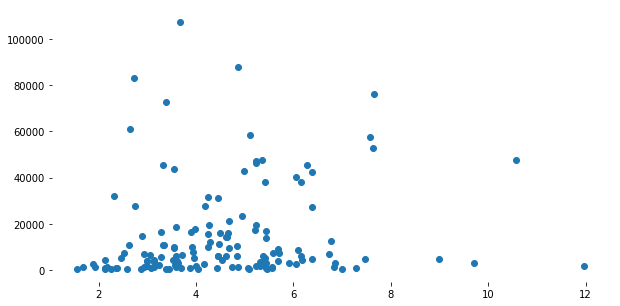

In [9]:
#Plot the data
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1, 1, 1)
ax1.scatter(df_countries['Educatspend'],df_countries['Gdppercapita'])
plt.box(on=None)
plt.show()

## **¿Do we have a linear relationship here?**<br>

<font size="3">
A linear relationship is not easily observerd. We can use the python library statsmodel to run Linear Regression. That library has the most useful statistics to analyze this data modelling technique. Let's watch:
</font><br>

In [10]:
#Import the function formula.api
import statsmodels.formula.api as sm

#Create a linear model - model1
model1 = 'Gdppercapita ~ Educatspend'
lm1   = sm.ols(formula = model1, data = df_countries).fit()
print('LINEAR REGRESSION - MODEL1')
print(lm1.summary())
print('-------------------------------------------------------------')

LINEAR REGRESSION - MODEL1
                            OLS Regression Results                            
Dep. Variable:           Gdppercapita   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     2.634
Date:                Fri, 01 Apr 2022   Prob (F-statistic):              0.107
Time:                        09:54:52   Log-Likelihood:                -1584.7
No. Observations:                 140   AIC:                             3173.
Df Residuals:                     138   BIC:                             3179.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    7352.7001 

## **¿What does all that data mean?**<br>

<font size="3">
We got a lot of information when we ran our linear regression. Let's focus only on the most important: The coefficients (the estimates of  $\beta _0$ and $\beta _1$ and ), as well as their -$p$ and -$R$ squared values.
</font><br><br>


**Coefficients**<br><br>

<font size="3">
The intercept  is about 7352 USD. This can be thought of as the baseline GDP per Capita. (Frequently, the intercept does not have a meaningful interpretation – that is okay.) The slope (the coefficient  for the Education Spending) is 1599.87. The interpretation of this coefficient is this: if a country spends 1% more of its GDP on education , its GDP per capita is expected to increase by 1599.87 USD on average.  
 </font><br>
 
 **p-values**<br><br>

<font size="3">
The null hypothesis we are testing here is <br><br>   
$H _0 : \beta _1 = 0$<br><br>
and the alternative is<br><br>
$H _1 : \beta _1 \neq 0$<br><br>  
    
The $p$-value of $ \beta _1$  (given under the column: $P > \vert t \vert $ ) is 0.127. Thus, it is not statistically significant at the 0.05 level, and we can not reject the null hypothesis. This implies that education spending as GDP percentage does explain the GDP per capita of a country.

There is no perfect or exact way of setting a statisically significant  - value threshold. It really depends on your needs as a data professional.  - values are used to assess how accurate we think a specific coefficient is. How certain do you need your interpretation of your coefficients to be? Generally, 0.05 is a common heuristic but it is not a hard-line number. 
</font><br><br>
 
 **R-squared**<br><br>


<font size="3"> 
One of the key quantities that should be paid attention to while interpreting a regression table is the quantity $R$-squared. Note that the table shows $R$-squared and adjusted $R$-squared. We will focus on $R$-squared. This quantity is always going to be between 0 and 1. For the GDP per Capita vs. Education Spending model, this quantity is 0.019 = 1.9%. In the world, there is a large variation in GDP per Capita. This means different countries have different GDP per Capita.

An $R$-squared of 1.9% in this linear model means that this observed variation in GDP per Capita is mostly due to random chance; we should probably look for another variable with higher explanatory powe. The higher the $R$-squared, the higher the percentage of observed variation that can be explained by the model. Since model1 only explains about 1.9% of the variation, this motivates us to investigate if factors other than Education Spending can be used to explain the GDP per Capita differences. Or if we should transform the variable Education Spending and see if it has a more powerful explanation of the variation on the GDP per capita. Let's do that with a logarithmic transformation:
</font><br><br>

In [11]:
#Log transformation
df_countries['ln_Gdppercapita'] = np.log(df_countries['Gdppercapita'])

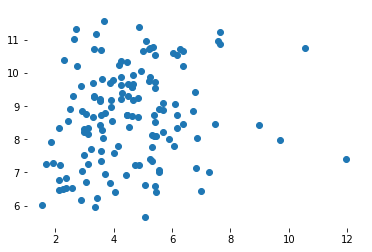

In [12]:
#Plot the data
fig = plt.figure()
ax1 = fig.add_subplot(1, 1, 1)
ax1.scatter(df_countries['Educatspend'],df_countries['ln_Gdppercapita'])
plt.box(on=None)
plt.show()

In [13]:
#Create a linear model - model2
model2 = 'ln_Gdppercapita ~ Educatspend'
lm2   = sm.ols(formula = model2, data = df_countries).fit()
print('LINEAR REGRESSION - MODEL2')
print(lm2.summary())
print('-------------------------------------------------------------')

LINEAR REGRESSION - MODEL2
                            OLS Regression Results                            
Dep. Variable:        ln_Gdppercapita   R-squared:                       0.032
Model:                            OLS   Adj. R-squared:                  0.025
Method:                 Least Squares   F-statistic:                     4.633
Date:                Fri, 01 Apr 2022   Prob (F-statistic):             0.0331
Time:                        09:54:52   Log-Likelihood:                -247.00
No. Observations:                 140   AIC:                             498.0
Df Residuals:                     138   BIC:                             503.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       8.0029 

<font size="3">
That was a very small improvement. <br><br>We should look for other variables or explore another problem. Let's see if GDP per capita has any relationship with life expectancy. You could probably think, that the richer the country the longer people live. Let's explore that problem:
</font><br><br>

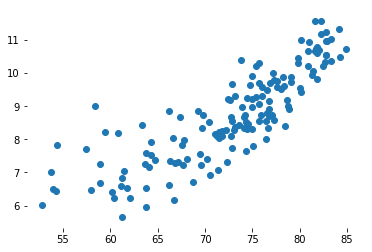

In [14]:
#Another indicator
indicator_id3 = 'SP.DYN.LE00.IN' #Life expectacy

#Download the data
life_expectancy = wb.download(indicator=indicator_id3, start=start, end=end, country='all')
life_expectancy.reset_index(inplace=True)
life_expectancy_2018 = life_expectancy[life_expectancy['year']=='2018']

df_TOTAL2 = pd.merge(life_expectancy_2018,gdp_per_capita_2018[['country','NY.GDP.PCAP.KD']], left_on='country',right_on='country', how='left')
df_TOTAL2.dropna(inplace=True)
df_countries2 = df_TOTAL2.iloc[49:200]
df_countries2.rename(columns={'SP.DYN.LE00.IN': 'LifeExp', indicator_id1: 'Gdppercapita'}, inplace=True)
df_countries2['ln_Gdppercapita'] = np.log(df_countries2['Gdppercapita'])

#Hacer un gráfico de los puntos
fig = plt.figure()
ax1 = fig.add_subplot(1, 1, 1)
ax1.scatter(df_countries2['LifeExp'],df_countries2['ln_Gdppercapita'])
plt.box(on=None)
plt.show()


<font size="3">
Now the relationship looks much more linear than before. This looks promising! <br><br> Let's jump into modelling these variables immediately using linear regression.
</font><br><br>

In [15]:
#Create a linear model - model2
model3 = 'LifeExp ~ ln_Gdppercapita'
lm3   = sm.ols(formula = model3, data = df_countries2).fit()
print('LINEAR REGRESSION - MODEL3')
print(lm3.summary())
print('-------------------------------------------------------------')

LINEAR REGRESSION - MODEL3
                            OLS Regression Results                            
Dep. Variable:                LifeExp   R-squared:                       0.715
Model:                            OLS   Adj. R-squared:                  0.713
Method:                 Least Squares   F-statistic:                     373.2
Date:                Fri, 01 Apr 2022   Prob (F-statistic):           2.05e-42
Time:                        09:55:00   Log-Likelihood:                -427.29
No. Observations:                 151   AIC:                             858.6
Df Residuals:                     149   BIC:                             864.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept      

<font size="3">
$R$-squared is much higher now around 71.5%.<br><br>

The $p$-value of $ \beta _1$  is 0.00. Thus, it is statistically significant at the 0.05 level, and we can reject the null hypothesis. This implies that Log of GDP per Capita does explain the Life Expectancy of the inhabitants of a country.<br><br>

Let's dig a little deeper into the meaning of $R$-squared. Graphically you can say that $R$-squared shows how much better does the linear regression model explain the data, when compared to a model of the average. 

Recall that the formula for $R$-squared is the following:

$R^2= 1 - \frac{RSS}{TSS} $  

 
Here RSS and TSS denote the Residual and Total Sum of Squares respectively. To understand the above formula carefully, look at the chart below where we plotted Life Expectancy vs. Log of GDP per Capita again.


If you consider a naive model given by:<br><br>


<div class="alert alert-block alert-info">
<font size="5"> 
$$Life Expectancy = \beta _0  + error$$ 
</font>  
</div><br>

the best guess for $\beta _0$ is just the average Life Expectancy. This is given by the red line. The sum of the squares of the residuals here is called the Total Sum of Squares (TSS). R-squared measures how well the regression line of model3 (Life Expectancy vs. Log of GDP per Capita) given by the blue line, explains the observed variation as compared to the naive model. The sum of residual squares for this model is the RSS.

</font><br>

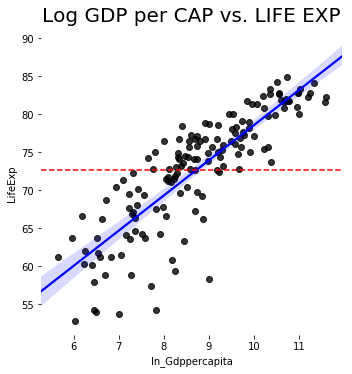

In [16]:
#Plot the regression and the naive model
sns.lmplot(x = 'ln_Gdppercapita', y = 'LifeExp', data = df_countries2, scatter_kws = {'color': (0/255,0/255,0/255)},line_kws = {'color': "blue"})
plt.title("Log GDP per CAP vs. LIFE EXP", fontsize=20, verticalalignment='bottom')
plt.axhline(df_countries2['LifeExp'].mean(), ls='--',color = 'r')
plt.xlabel("ln_Gdppercapita")
plt.ylabel("LifeExp")
plt.box(on=None);

<font size="3"> 

So far we have followed an example of linear regression without asking if there are some assumptions we need to check. Indeed there are a few. Some of the most important assumptions are:<br><br>

***
1. The mean value of the residuals is cero.
2. The variance of the residuals is constant.
3. The residuals are not auto-correlated.
***

In the classic linear regression, one assumption is that residuals are normal and indepently distributed. If that happens 1, 2 and 3 are ok.
<br><br>


In the following chart, we can check if the mean of the residuals is zero from visual inspection.
</font><br>

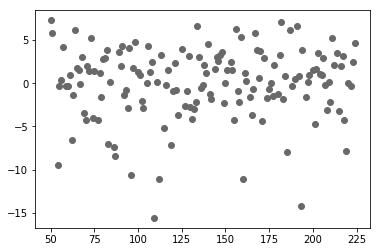

In [25]:
#Plot the residuals
plt.plot(lm3.resid,marker='o',linestyle='None',color='dimgrey');

<font size="3"> 
The mean seems to be around zero, but there is some skew in the data. Let's plot an histogram an watch if they look somehow normally distributed.
</font><br>

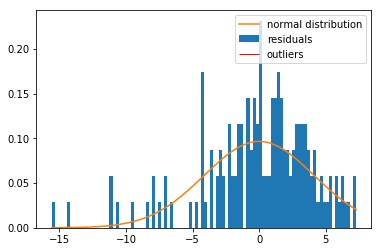

In [32]:
#Plot the residuals in an histogram
plt.hist(lm3.resid, 
    density=True,     # the histogram integrates to 1 
                      # (so it can be compared to the normal distribution)
    bins=100,         #  draw a histogram with 100 bins of equal width
    label="residuals" # label for legend
    )

# now plot the normal distribution for comparison
xx = np.linspace(lm3.resid.min(), lm3.resid.max(), num=1000)
plt.plot(xx, scipy.stats.norm.pdf(xx, loc=0.0, scale=np.sqrt(lm3.scale)),
    label="normal distribution")

outliers = np.abs(lm3.resid)>4*np.sqrt(lm3.scale)

sns.rugplot(lm3.resid[outliers],
            color="red", # otherwise the rugplot has the same color as the histogram
            label="outliers")
plt.legend(loc="upper right");

<font size="3"> 
One can plot the residuals using a probability plot as well. If the residuals are normally distributed they will perfectly fit on the red line in the following chart.
</font><br>

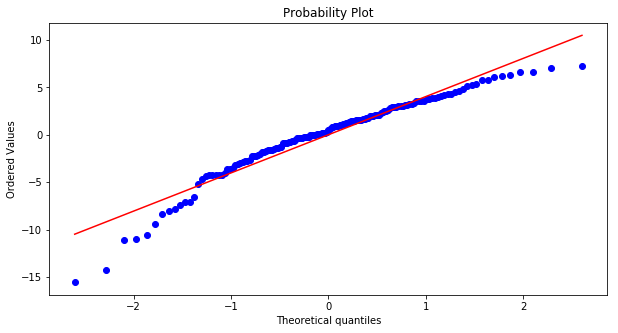

In [37]:
#Probability Plot
from scipy import stats

fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(10,5))
stats.probplot(x=lm3.resid, dist = "norm", plot = ax)
plt.show()

<font size="3"> 
To finish this topic we will show a way to identify which variables might me transformed, as we did we the logarithmic GDP per capita in this example. You can use the `boxcox statistics`. If this number is close to 1 you don't need to do anything. When it is close to zero, the logarithmic transformation is recomended. When it is closer to 0.5 you can use the square root transformation. When is closer to zero or negative, logarithmic transformation is a good choice.
</font>

In [40]:
#Calculate boxcox statistic
price,fitted_lambda = stats.boxcox(df_countries2['Gdppercapita'])
round(fitted_lambda,2)

0.01

<font size="3"> 
<div class="alert alert-block alert-danger">
<b>Please remember:</b> Here the boxcox statistics is close to zero. It suggest a logarithmic transformation. We can corroborate that transformation using the probability plot we introduce before. 
</div>
</font>

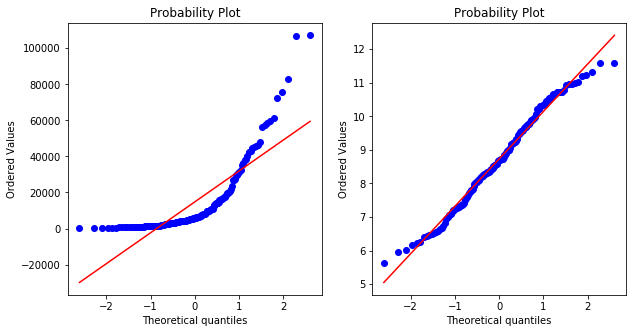

In [17]:
from scipy import stats

fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(10,5))
stats.probplot(x=df_countries2['Gdppercapita'], dist = "norm", plot = ax[0])
stats.probplot(x=df_countries2['ln_Gdppercapita'], dist = "norm", plot = ax[1])
plt.show()

<font size="3"> 
<div class="alert alert-block alert-success">
<b>ONE LAST THING:</b> To finish this topic about linear regression, we would like to show another library that handles these calculations. It is sklearn. Below we show and example on how to do linear regression using this package.
</div>
</font>


In [54]:
from sklearn.linear_model import LinearRegression

X = df_countries2['ln_Gdppercapita'].values
y = df_countries2['LifeExp'].values

X_train =  X[0:120].reshape(-1, 1)
X_test = X[121:150].reshape(-1, 1)
y_train= y[0:120].reshape(-1, 1)
y_test = y[121:150].reshape(-1, 1)


linear  = LinearRegression(normalize=True)
linear.fit(X_train,y_train)
print('R2 =',linear.score(X_train,y_train))
print('R2 =',linear.score(X_test,y_test))

R2 = 0.7194112872739493
R2 = 0.6886870566465438


In [55]:
print('w1 =',linear.coef_)
print('w0 =',linear.intercept_)

w1 = [[4.6746765]]
w0 = [31.86238292]


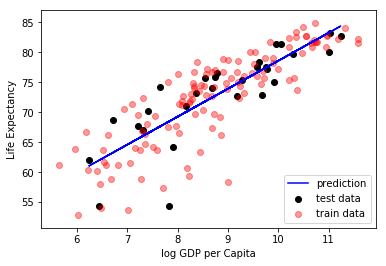

In [57]:
y_pred = linear.predict(X_test)

plt.scatter(X_test, y_test,  color='black',label=r'test data')
plt.scatter(X_train, y_train,  color='red',alpha=0.4,label=r'train data')
plt.plot(X_test, y_pred, color='blue',label=r'prediction')
plt.legend(loc='lower right')

plt.xlabel(r'log GDP per Capita')
plt.ylabel(r'Life Expectancy')

plt.show()

> What we have to learn to do, we learn by doing. 

Aristotle


posts about quantitative finance, data science and emerging markets  <a href="http://earthdatascience.org" target="_blank">this link</a>.

